In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [8]:
ticker = 'AMZN'
start_date = '2018-01-01'
end_date = '2023-12-12'

In [9]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,58.599998,59.500000,58.525501,59.450500,59.450500,53890000
1,2018-01-03,59.415001,60.274502,59.415001,60.209999,60.209999,62176000
2,2018-01-04,60.250000,60.793499,60.233002,60.479500,60.479500,60442000
3,2018-01-05,60.875500,61.457001,60.500000,61.457001,61.457001,70894000
4,2018-01-08,61.799999,62.653999,61.601501,62.343498,62.343498,85590000
...,...,...,...,...,...,...,...
1491,2023-12-05,143.550003,148.570007,143.130005,146.880005,146.880005,46822400
1492,2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39679000
1493,2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800
1494,2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000


In [10]:
close = df['Close']

In [11]:
print(close.values)

[ 59.45050049  60.20999908  60.47949982 ... 146.88000488 147.41999817
 145.88999939]


In [12]:
scaler = MinMaxScaler()
data = scaler.fit_transform(close.values.reshape(-1, 1))
data

array([[0.        ],
       [0.00597466],
       [0.00809471],
       ...,
       [0.68777146],
       [0.69201936],
       [0.6799835 ]])

In [13]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]
train_data.shape, test_data.shape

((1196, 1), (300, 1))

In [70]:
past_values = 60
def data_preparation(data,past_values):
    X = []
    y = []
    for i in range(past_values, len(data)-20):
        X.append(data[i-past_values:i])
#         y.append(data[i])
        y.append(data[i:i+20])
#         print(data[i:i+20])
    return np.array(X), np.array(y)

In [71]:
X_train, y_train = data_preparation(train_data,past_values)
X_test, y_test = data_preparation(test_data,past_values)

In [72]:
X_train, y_train

(array([[[0.        ],
         [0.00597466],
         [0.00809471],
         ...,
         [0.14429279],
         [0.12116112],
         [0.09534691]],
 
        [[0.00597466],
         [0.00809471],
         [0.0157843 ],
         ...,
         [0.12116112],
         [0.09534691],
         [0.10160869]],
 
        [[0.00809471],
         [0.0157843 ],
         [0.02275801],
         ...,
         [0.09534691],
         [0.10160869],
         [0.07197138]],
 
        ...,
 
        [[0.49480413],
         [0.51399861],
         [0.49991742],
         ...,
         [0.61225221],
         [0.56088343],
         [0.55333146]],
 
        [[0.51399861],
         [0.49991742],
         [0.48560024],
         ...,
         [0.56088343],
         [0.55333146],
         [0.5449929 ]],
 
        [[0.49991742],
         [0.48560024],
         [0.44603133],
         ...,
         [0.55333146],
         [0.5449929 ],
         [0.52957441]]]),
 array([[[0.10160869],
         [0.07197138],
         

In [73]:
X_train.shape, y_train.shape

((1116, 60, 1), (1116, 20, 1))

In [74]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(20))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 7s 178ms/step - loss: 0.2581
Epoch 2/200
6/6 [==============================] - 1s 183ms/step - loss: 0.1434
Epoch 3/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0807
Epoch 4/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0404
Epoch 5/200
6/6 [==============================] - 1s 182ms/step - loss: 0.0186
Epoch 6/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0122
Epoch 7/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0087
Epoch 8/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0085
Epoch 9/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0080
Epoch 10/200
6/6 [==============================] - 1s 179ms/step - loss: 0.0076
Epoch 11/200
6/6 [==============================] - 1s 176ms/step - loss: 0.0070
Epoch 12/200
6/6 [==============================] - 1s 178ms/step - loss: 0.0071
Epoch 13/200
6/6 [===================

6/6 [==============================] - 1s 177ms/step - loss: 0.0051
Epoch 103/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0052
Epoch 104/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0051
Epoch 105/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0050
Epoch 106/200
6/6 [==============================] - 1s 185ms/step - loss: 0.0052
Epoch 107/200
6/6 [==============================] - 1s 175ms/step - loss: 0.0052
Epoch 108/200
6/6 [==============================] - 1s 181ms/step - loss: 0.0053
Epoch 109/200
6/6 [==============================] - 1s 180ms/step - loss: 0.0051
Epoch 110/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0052
Epoch 111/200
6/6 [==============================] - 1s 174ms/step - loss: 0.0054
Epoch 112/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0055
Epoch 113/200
6/6 [==============================] - 1s 177ms/step - loss: 0.0055
Epoch 114/200
6/6 [===========

In [128]:
pred_train = model.predict(X_train)

35/35 [==============================] - 1s 22ms/step


In [129]:
pred_train #= pred_train.reshape(y_train.shape)

array([[0.13857874, 0.14520867, 0.13715483, ..., 0.16718593, 0.16287062,
        0.17072484],
       [0.1320688 , 0.13981272, 0.13130368, ..., 0.16194378, 0.15830466,
        0.1663537 ],
       [0.12390123, 0.13297768, 0.12385429, ..., 0.15536463, 0.15275955,
        0.16094206],
       ...,
       [0.5628831 , 0.53699654, 0.5127653 , ..., 0.55493575, 0.5443653 ,
        0.56999904],
       [0.5334091 , 0.5135179 , 0.48406848, ..., 0.54300994, 0.5454266 ,
        0.57154626],
       [0.5002735 , 0.4861283 , 0.45550025, ..., 0.52975446, 0.545522  ,
        0.57285   ]], dtype=float32)

In [130]:
# pred = scaler.inverse_transform(pred_train.reshape(1,-1))
# pred

In [131]:
# y_train = scaler.inverse_transform(y_train.reshape(1,-1))
# y_train

In [132]:
pred_train.shape

(1116, 20)

In [133]:
y_train.shape

(1, 22320)

In [102]:
# import math
# # mae = mean_absolute_error(y_train, pred_train)
# # mse = mean_squared_error(y_train, pred_train)

# mse = math.sqrt(np.mean((y_train - pred_train) ** 2))
# print('mean squared error-', mse)

# mae = np.mean(np.abs(y_train - pred_train))
# print('mean absolute error-', mae)

In [134]:
pred_train.ndim, y_train.ndim

(2, 2)

In [135]:
# pred_train[0], y_train[0]

In [136]:
len(pred_train), len(y_train)

(1116, 1)

In [137]:
# days = np.arange(1,1117).reshape(1116,1,1)
# days

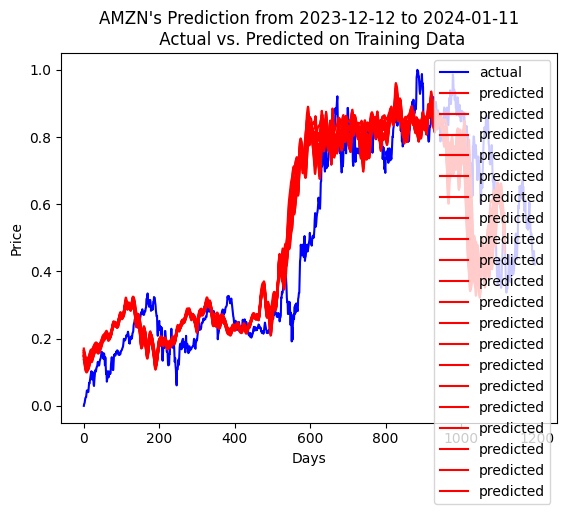

In [107]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(train_data, color='blue', label='actual')
plt.plot(pred_train, color='red', label='predicted')
plt.legend()

In [108]:
pred_test = model.predict(X_test)

7/7 [==============================] - 0s 23ms/step


In [109]:
# mae = mean_absolute_error(y_test, pred_test)
# print('mean absolute error-', mae)
# mse = mean_squared_error(y_test, pred_test)
# print('mean squared error-', mse)

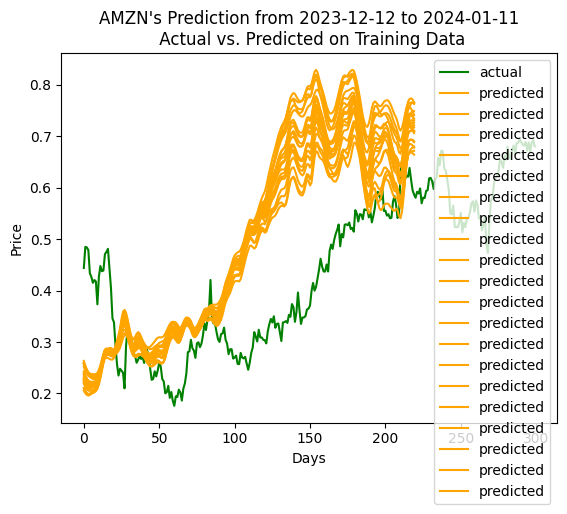

In [110]:
plt.title(f"{ticker}'s Prediction from {start_date} to {end_date}\n Actual vs. Predicted on Training Data")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(test_data, color='green', label='actual')
plt.plot(pred_test, color='orange', label='predicted')
plt.legend()

In [139]:
ticker = 'AMZN'
start_date = '2023-12-12'
end_date = '2024-01-11'
df_future = yf.download(ticker, start_date, end_date).reset_index()['Close']
df_future

[*********************100%***********************]  1 of 1 completed


0     147.479996
1     148.839996
2     147.419998
3     149.970001
4     154.070007
5     153.789993
6     152.119995
7     153.839996
8     153.419998
9     153.410004
10    153.339996
11    153.380005
12    151.940002
13    149.929993
14    148.470001
15    144.570007
16    145.240005
17    149.100006
18    151.369995
19    153.729996
Name: Close, dtype: float64

In [140]:
len(df_future)

20

In [141]:
df_future = df_future.values

In [142]:
future_data_to_predict = np.array(close[-60:])
future_data_to_predict

array([139.97999573, 137.63000488, 135.28999329, 129.33000183,
       129.11999512, 131.27000427, 125.98000336, 125.98000336,
       125.98000336, 127.12000275, 129.46000671, 124.72000122,
       127.        , 125.95999908, 127.95999908, 128.25999451,
       129.47999573, 131.83000183, 132.33000183, 129.78999329,
       132.55000305, 131.47000122, 128.13000488, 128.3999939 ,
       125.16999817, 126.55999756, 128.55999756, 121.38999939,
       119.56999969, 127.73999786, 132.71000671, 133.08999634,
       137.        , 138.07000732, 138.6000061 , 139.74000549,
       142.71000671, 142.08000183, 140.6000061 , 143.55999756,
       142.58999634, 145.80000305, 143.19999695, 142.83000183,
       145.17999268, 146.13000488, 143.8999939 , 146.71000671,
       146.74000549, 147.72999573, 147.02999878, 146.32000732,
       146.08999634, 147.02999878, 144.83999634, 146.88000488,
       144.52000427, 146.88000488, 147.41999817, 145.88999939])

---------------------------------------------------------------------------------------------------------------------------

In [143]:
f = model.predict(future_data_to_predict.reshape(1,60,1))
f

1/1 [==============================] - 0s 73ms/step


array([[1.7209237 , 1.4896688 , 1.6208123 , 1.5790044 , 1.3555189 ,
        1.4802656 , 1.4497647 , 1.526524  , 1.5022373 , 1.4417266 ,
        1.2327754 , 1.2320955 , 1.1787254 , 0.90612346, 1.0437894 ,
        1.2803386 , 1.3430637 , 1.2120531 , 0.9770402 , 1.0587343 ]],
      dtype=float32)

In [144]:
# def prediction(data):
    
#     output_list = []
    
# #     for i in range(days):
# #         temp = scaler.transform(future_data.reshape(-1, 1))
# #         reshaped_data = temp.reshape(60, 1, 1)
# #         predicted_value = model.predict(reshaped_data)
# #         actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
# #         output_list.append(actual_predicted)
    
# #     data = data.reshape(1,60,1)
#     predicted_value = model.predict(data)
# #     actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
#     output_list.append(actual_predicted)

#     return actual_predicted
    

In [145]:
# len(future_data_to_predict)

In [146]:
# result = prediction(future_data_to_predict, len(df_future))
# result = prediction(future_data_to_predict)
# result

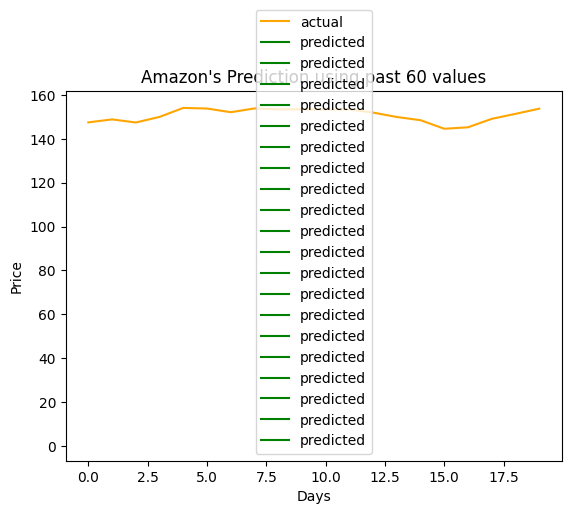

In [148]:
plt.title(f"Amazon's Prediction using past {len(future_data_to_predict)} values")
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df_future, color='orange', label='actual')
plt.plot(f, color='green', label='predicted')
plt.legend()

In [268]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    inv = []
    curr_val = 1000
    print("*******************",np.where(controls))
    
    inds = np.where(controls)[0]
    print(inds)
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [139]:
controls_actual = get_control_vector(df_future)
amount_actual = buy_and_sell_bot(df_future, controls_actual)
controls_actual,amount_actual

******************* (array([0, 3, 4], dtype=int64),)
[0 3 4]


(array([-2.,  0.,  0.,  2., -2.]),
 [1000, 1000, 1000, 1000, 1000, 1000, 1000.2609139551153])

In [140]:
controls_pred= get_control_vector(np.array(result))
amount_pred = buy_and_sell_bot(result, controls_pred)
controls_pred,amount_pred

******************* (array([0], dtype=int64),)
[0]


IndexError: index -1 is out of bounds for axis 0 with size 0

In [39]:
def Fpredict(days, past_data):
    print(days, past_data)
    for i in range(days):

        temp = scaler.transform(past_data.reshape(-1, 1))
        temp_scaled_reshape = temp.reshape(1, 20, 1)
#         print(temp_scaled_reshape)
        predicted_value = model.predict(temp_scaled_reshape)
        actual_predicted = scaler.inverse_transform(predicted_value.reshape(1,-1))
        
        print(actual_predicted)

In [40]:
Fpredict(20, future_data_to_predict)

20 [137.         138.07000732 138.6000061  139.74000549 142.71000671
 142.08000183 140.6000061  143.55999756 142.58999634 145.80000305
 143.19999695 142.83000183 145.17999268 146.13000488 143.8999939
 146.71000671 146.74000549 147.72999573 147.02999878 146.32000732]
1/1 [==============================] - 0s 52ms/step
[[147.05513]]
1/1 [==============================] - 0s 55ms/step
[[147.05513]]
1/1 [==============================] - 0s 52ms/step
[[147.05513]]
1/1 [==============================] - 0s 59ms/step
[[147.05513]]
1/1 [==============================] - 0s 60ms/step
[[147.05513]]
1/1 [==============================] - 0s 55ms/step
[[147.05513]]
1/1 [==============================] - 0s 44ms/step
[[147.05513]]
1/1 [==============================] - 0s 82ms/step
[[147.05513]]
1/1 [==============================] - 0s 58ms/step
[[147.05513]]
1/1 [==============================] - 0s 55ms/step
[[147.05513]]
1/1 [==============================] - 0s 55ms/step
[[147.05513]]
1/1 [==

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

ticker = 'AMZN'
start_date = '2018-01-01'
end_date = '2023-11-30'

data = yf.download(ticker, start_date, end_date).reset_index()

closing_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Create sequences for input data and target values
def create_sequences(data, sequence_length, target_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length - target_length + 1):
        seq = data[i : i + sequence_length]
        target = data[i + sequence_length : i + sequence_length + target_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 60
target_length = 20  # Set target_length to 60

# Create training sequences
X_train, y_train = create_sequences(closing_prices_scaled, sequence_length, target_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    tf.keras.layers.LSTM(units=50, activation='relu', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=1))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Make predictions for the next 20 days based on the most recent 60 days
latest_60_days = closing_prices_scaled[-sequence_length:].reshape(1, sequence_length, 1)
predicted_prices = model.predict(latest_60_days)

# Inverse transform the predicted prices to get them in the original scale
predicted_prices_actual_scale = scaler.inverse_transform(predicted_prices[0])

# Print the predicted prices for the next 20 days
print(predicted_prices_actual_scale)


[*********************100%***********************]  1 of 1 completed
Epoch 1/50


ValueError: in user code:

    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 1608, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 60 and 20 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](sequential_4/time_distributed_2/Reshape_1, IteratorGetNext:1)' with input shapes: [?,60,1], [?,20,1].
